# Challenge - What Do You See?

Let's go out into the world and generate some beautiful visuals. Pick a data source from this aggregation, load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import operator

Let's load the data into a dataframe

In [309]:
directory = '/Users/Stephanie/desktop/thinkful/projects/prep/U2-L2.3-plotting/youtube/'
file = 'USvideos.csv'

df = pd.read_csv(directory + file)

We have the followign columns

In [310]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## Figure 1 - Histogram

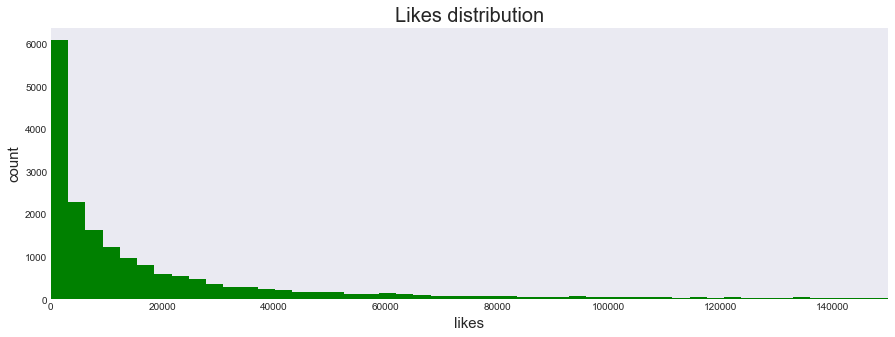

In [311]:
sns.set_style('dark')
plt.figure(figsize =(15,5))
plt.title('Likes distribution', fontsize=20)
x = df['likes']
plt.hist(x, color='green', bins=1000)
plt.xlim(0,150000)
plt.xlabel('likes', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

Our data is skewed to the righ as we have a zero boundary (you can't get less than zero likes). What the chart above really shows us is how the probability of an event happening (likes) 'n' times (number of likes) decreases as 'n' increases. That's why most of the videos only get a low number of likes compared to the maximul value in the dataset.

In the plot we have excluded values higher than 150.000 likes for visual purposes

## Figure 2 - Scatter views vs likes

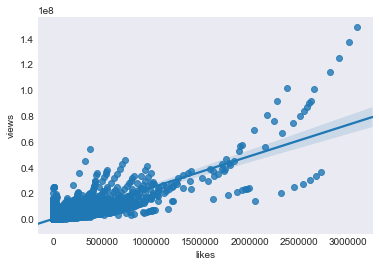

In [312]:
rated = df.loc[df['ratings_disabled'] == False] #remove videos with ratings disabled

plt.figure()
sns.regplot(x=rated.likes, y=rated.views)
plt.show()

In [313]:
df.likes.corr(df.views)

0.8246043599302345

There's a strong positive correlation between views and likes, which makes sense. The more users that see a video the more likes it can get. In the chat we can appreciate differentiate lines from vertical to flatter. Seems like some categories of vieos required less views to get to the same level of likes. Those videos that a user watch repeted times (like songs) will probably have more views for the same amount of likes as other videos, as the ratio unique user/views will be much lower.

## Figure 3 - Days of the week

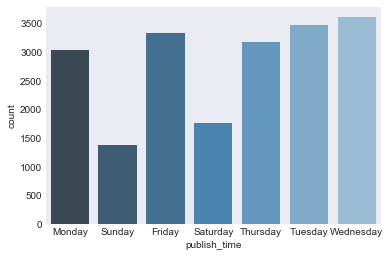

In [314]:
publish_time = pd.to_datetime(df.publish_time)
publish_time = publish_time.dt.weekday_name

plt.figure()
sns.countplot(x=publish_time, palette="Blues_d")
plt.show()

Weekends are the least busy time of the week and Wednesdays the busiest

## Figure 4 - Publish time for pop and comedy videos

We're gonna find the most used tags and select a couple to see the differences in publishing time

In [315]:
df['tags'] = df.tags.map(lambda x: x.lower())

tags = []
for tag in df.tags:
    tag = tag.replace('"','')
    tag = tag.split('|')
    tags = tags + tag

tags_count = dict(Counter(tags))

top10_tags = dict(sorted(tags_count.items(), key=operator.itemgetter(1), reverse=True)[:10])
top10_tags

{'2017': 656,
 '[none]': 895,
 'comedy': 1728,
 'funny': 1827,
 'how to': 628,
 'humor': 612,
 'music': 795,
 'news': 777,
 'pop': 619,
 'trailer': 656}

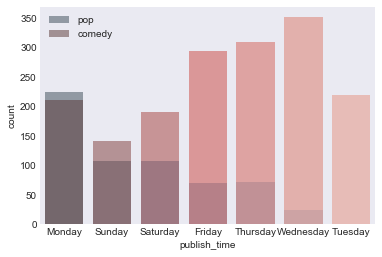

In [316]:
pop = df[df['tags'].str.contains('"pop"')]
comedy = df[df['tags'].str.contains('"comedy"')]

pop_time = pd.to_datetime(pop.publish_time)
pop_time = pop_time.dt.weekday_name

comedy_time = pd.to_datetime(comedy.publish_time)
comedy_time = comedy_time.dt.weekday_name

plt.figure()
sns.countplot(x=pop_time, palette="Blues_d", alpha=0.5)
sns.countplot(x=comedy_time, palette="Reds_d", alpha=0.5)
plt.legend(['pop', 'comedy'])
plt.show()

Both tags follow opposite distributions during the week.